<a href="https://colab.research.google.com/github/SkaldorHub/ds_fertility_rate/blob/master/Niger%26Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
import os

# create output folder
os.makedirs("diagram_output", exist_ok=True)

FileNotFoundError: [Errno 2] No such file or directory: 'diagram_output/world_fertility_rate.png'

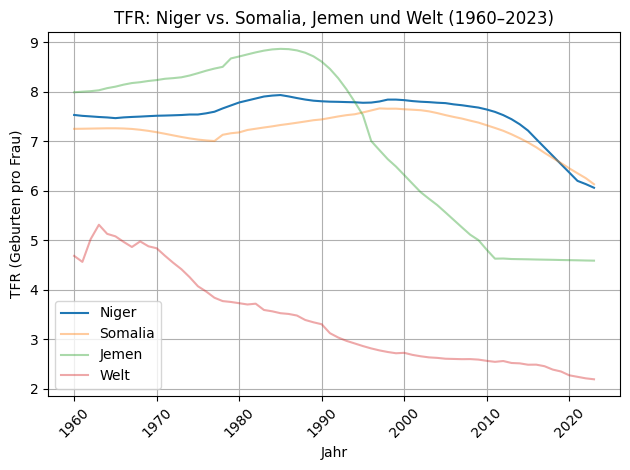

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read Data
output = pd.read_excel("fertility_rates_Niger-Somalia-Yemen-World.xlsx", sheet_name="Data")
output = output.set_index("Country Name")

# Einzelne Länder extrahieren
niger_data = output.loc["Niger"]
somalia_data = output.loc["Somalia"]
yemen_data = output.loc["Yemen, Rep."]
world_data = output.loc["World"]

# X-Achse: Jahre (ab 1960)
years = output.columns[3:]

# Jahre bereinigen: nur die Jahreszahl vor dem Leerzeichen bzw. vor der [
years_clean = [str(year).split(' ')[0] for year in years]

# Y-Achse: Werte
niger_rates = niger_data[3:].values
somalia_rates = somalia_data[3:].values
yemen_rates = yemen_data[3:].values
world_rates = world_data[3:].values

# Diagramm erstellen
plt.plot(years_clean, niger_rates, label="Niger", alpha=1)  # volle Deckkraft
plt.plot(years_clean, somalia_rates, label="Somalia", alpha=0.4)  # transparenter
plt.plot(years_clean, yemen_rates, label="Jemen", alpha=0.4)
plt.plot(years_clean, world_rates, label="Welt", alpha=0.4)

# Beschriftungen und Stil
plt.xticks(years_clean[::10], rotation=45)
plt.title("TFR: Niger vs. Somalia, Jemen und Welt (1960–2023)")
plt.xlabel("Jahr")
plt.ylabel("TFR (Geburten pro Frau)")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Speichern und anzeigen
plt.savefig("diagram_output/world_fertility_rate.png", dpi=1200)
plt.show()


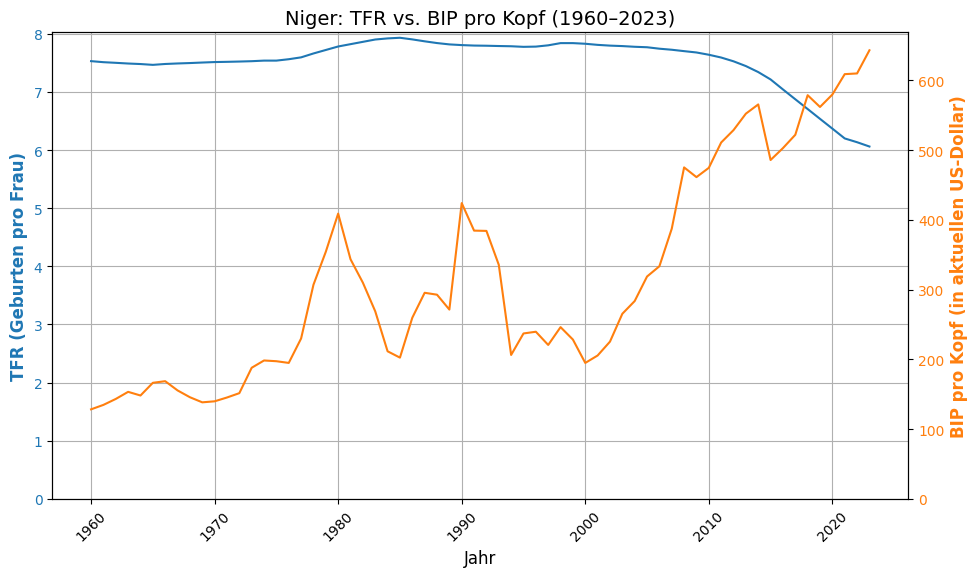

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# GDP-Daten einlesen
gdp_df = pd.read_excel("Niger_GDP-per-Capita.xlsx", sheet_name="Data")
gdp_df = gdp_df[gdp_df["Country Name"] == "Niger"]

# Jahre extrahieren
years = gdp_df.columns[4:]
years_clean = [str(year).split(' ')[0] for year in years]

# GDP-Werte
gdp_values = gdp_df.iloc[0, 4:].values
gdp_values = pd.to_numeric(gdp_values, errors="coerce")

# Fertility-Daten
fert_df = pd.read_excel("Niger_Fertility-rates.xlsx", sheet_name="Data")
fert_df = fert_df[fert_df["Country Name"] == "Niger"]
fert_values = fert_df.iloc[0, 4:].values
fert_values = pd.to_numeric(fert_values, errors="coerce")

# Diagramm
fig, ax1 = plt.subplots(figsize=(10, 6))

# Farben
fertility_color = "#1f77b4"  # Standard-Blau
gdp_color = "#ff7f0e"        # Standard-Orange

# Achse 1: Fertility Rate
ax1.set_xlabel("Jahr", fontsize=12)
ax1.set_ylabel("TFR (Geburten pro Frau)", color=fertility_color,
               fontsize=12, fontweight='bold')
ax1.plot(years_clean, fert_values, color=fertility_color, label="Fertility Rate")
ax1.tick_params(axis="y", labelcolor=fertility_color, labelsize=10)
ax1.set_ylim(bottom=0)  # Y-Achse links bei 0 starten

# Achse 2: GDP per Capita
ax2 = ax1.twinx()
ax2.set_ylabel("BIP pro Kopf (in aktuellen US-Dollar)", color=gdp_color,
               fontsize=12, fontweight='bold')
ax2.plot(years_clean, gdp_values, color=gdp_color, label="GDP per Capita")
ax2.tick_params(axis="y", labelcolor=gdp_color, labelsize=10)
ax2.set_ylim(bottom=0)  # Y-Achse rechts bei 0 starten

# X-Achse
ax1.set_xticks([years_clean[i] for i in range(0, len(years_clean), 10)])
ax1.set_xticklabels([years_clean[i] for i in range(0, len(years_clean), 10)],
                    rotation=45, fontsize=10)

# Titel & Layout
plt.title("Niger: TFR vs. BIP pro Kopf (1960–2023)", fontsize=14)
ax1.grid(True)
fig.tight_layout()

plt.show()


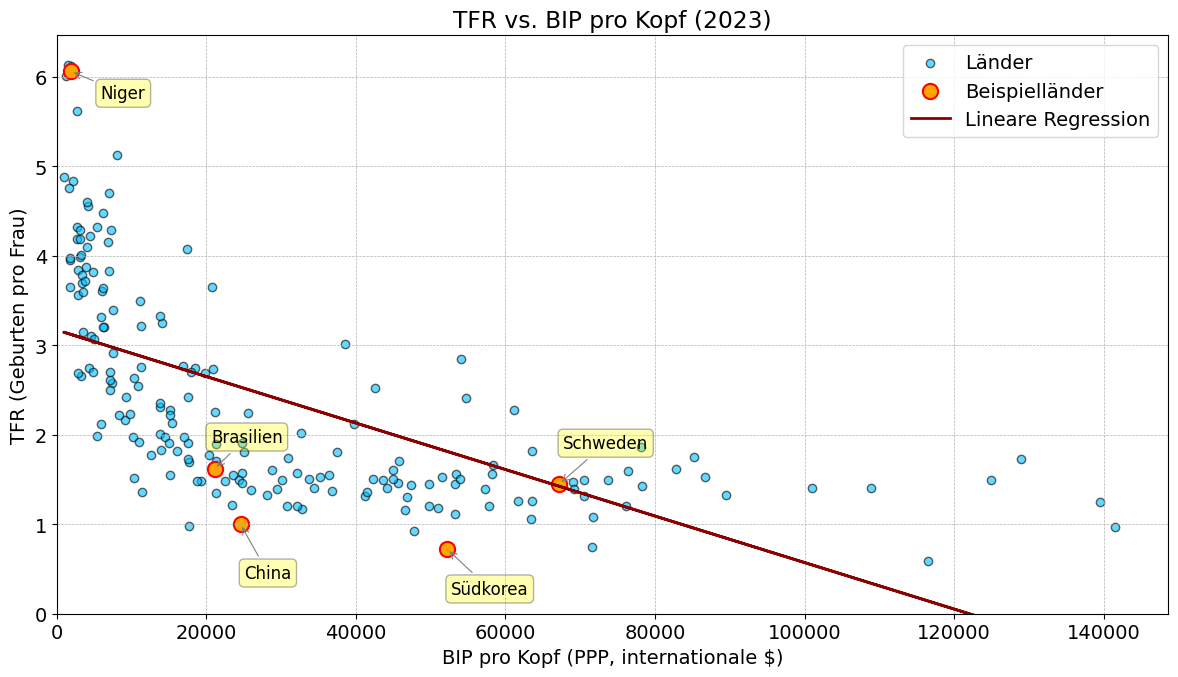

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Excel-Datei laden
df = pd.read_excel("Fertility_Rate-GDP_Per_Capita.xlsx")

# Spalten anpassen
df = df[[
    "Country Name",
    "GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]",
    "Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]"
]].copy()

df.columns = ["Country", "GDP_per_capita", "Fertility_rate"]
df.dropna(inplace=True)
df = df[df["GDP_per_capita"] > 0]

# Regression
X = df["GDP_per_capita"].values.reshape(-1, 1)
y = df["Fertility_rate"].values
reg = LinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X)

# Länder, die hervorgehoben und beschriftet werden sollen
highlight_countries = ["Niger", "Brazil", "Korea, Rep.", "China", "Sweden"]

# Deutsche Namen für diese Länder
deutsche_namen = {
    "Niger": "Niger",
    "Brazil": "Brasilien",
    "Korea, Rep.": "Südkorea",
    "China": "China",
    "Sweden": "Schweden"
}

# Plot
plt.figure(figsize=(12, 7))
plt.scatter(df["GDP_per_capita"], df["Fertility_rate"],
            alpha=0.6, edgecolor="k", color="deepskyblue", label="Länder")

# Hervorhebung der ausgewählten Länder
highlight_df = df[df["Country"].isin(highlight_countries)]
plt.scatter(highlight_df["GDP_per_capita"], highlight_df["Fertility_rate"],
            color='orange', edgecolor='red', s=120, linewidth=1.5, label='Beispielländer')

# Beschriftung mit individuellen Positionen (Offset) wie beim letzten Plot
offsets = {
    "Niger": (4000, -0.3),       # rechts unten (x in $)
    "Brazil": (-500, 0.3),    # links unten
    "Korea, Rep.": (500, -0.5), # rechts unten
    "China": (500, -0.6),       # rechts unten tiefer
    "Sweden": (500, 0.4)        # rechts oben
}

for country in highlight_countries:
    row = highlight_df[highlight_df["Country"] == country]
    if not row.empty:
        x = row["GDP_per_capita"].values[0]
        y = row["Fertility_rate"].values[0]
        dx, dy = offsets.get(country, (100, 0))
        label = deutsche_namen.get(country, country)
        plt.annotate(label,
                     xy=(x, y), xycoords='data',
                     xytext=(x + dx, y + dy), textcoords='data',
                     fontsize=12,  # Schriftgröße vergrößert
                     arrowprops=dict(arrowstyle="->", color='gray', lw=0.8),
                     bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.3))

# Regressionslinie
plt.plot(df["GDP_per_capita"], y_pred, color="darkred", linewidth=2, label="Lineare Regression")

plt.xlabel("BIP pro Kopf (PPP, internationale $)")
plt.ylabel("TFR (Geburten pro Frau)")
plt.title("TFR vs. BIP pro Kopf (2023)")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.legend()
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()


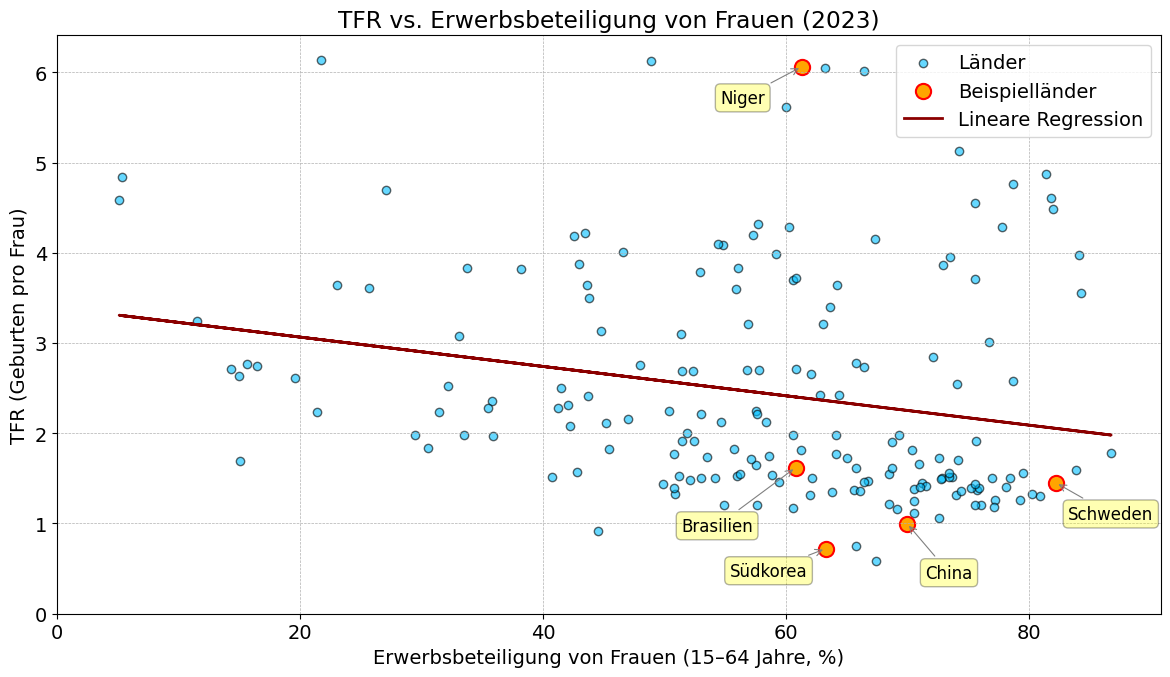

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Excel-Datei laden
df = pd.read_excel("Fertility_Rate-Labor_Force_Participation_Rate.xlsx")

# Relevante Spalten extrahieren
df = df[[
    "Country Name",
    "Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate) [SL.TLF.ACTI.FE.ZS]",
    "Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]"
]].copy()

# Spalten umbenennen
df.columns = ["Country", "Labor_force_participation", "Fertility_rate"]
df.dropna(inplace=True)

# Regression
X = df["Labor_force_participation"].values.reshape(-1, 1)
y = df["Fertility_rate"].values
reg = LinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X)

# Länder, die hervorgehoben und beschriftet werden sollen
highlight_countries = ["Niger", "Brazil", "Korea, Rep.", "China", "Sweden"]

# Deutsche Namen für diese Länder
deutsche_namen = {
    "Niger": "Niger",
    "Brazil": "Brasilien",
    "Korea, Rep.": "Südkorea",
    "China": "China",
    "Sweden": "Schweden"
}

# Plot
plt.figure(figsize=(12, 7))
plt.scatter(df["Labor_force_participation"], df["Fertility_rate"],
            alpha=0.6, edgecolor="k", color="deepskyblue", label="Länder")

# Hervorhebung
highlight_df = df[df["Country"].isin(highlight_countries)]
plt.scatter(highlight_df["Labor_force_participation"], highlight_df["Fertility_rate"],
            color='orange', edgecolor='red', s=120, linewidth=1.5, label='Beispielländer')

# Individuelle Beschriftungspositionen
offsets = {
    "Niger": (-3, -0.4),      # rechts unten
    "Brazil": (-3.5, -0.7),    # links unten
    "Korea, Rep.": (-1.5, -0.3),# rechts unten
    "China": (1.5, -0.6),      # rechts unten
    "Sweden": (1, -0.4)       # rechts oben
}

# Beschriftung der Beispielländer mit größerer Schrift
for country in highlight_countries:
    row = highlight_df[highlight_df["Country"] == country]
    if not row.empty:
        x = row["Labor_force_participation"].values[0]
        y = row["Fertility_rate"].values[0]
        dx, dy = offsets.get(country, (1, 0))
        ha = "left" if dx >= 0 else "right"
        label = deutsche_namen.get(country, country)
        plt.annotate(label,
                     xy=(x, y), xycoords='data',
                     xytext=(x + dx, y + dy), textcoords='data',
                     fontsize=12,  # Schriftgröße vergrößert
                     ha=ha,
                     arrowprops=dict(arrowstyle="->", color='gray', lw=0.8),
                     bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.3))

# Regressionslinie
plt.plot(df["Labor_force_participation"], y_pred, color="darkred", linewidth=2, label="Lineare Regression")

plt.xlabel("Erwerbsbeteiligung von Frauen (15–64 Jahre, %)")
plt.ylabel("TFR (Geburten pro Frau)")
plt.title("TFR vs. Erwerbsbeteiligung von Frauen (2023)")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.legend()
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()


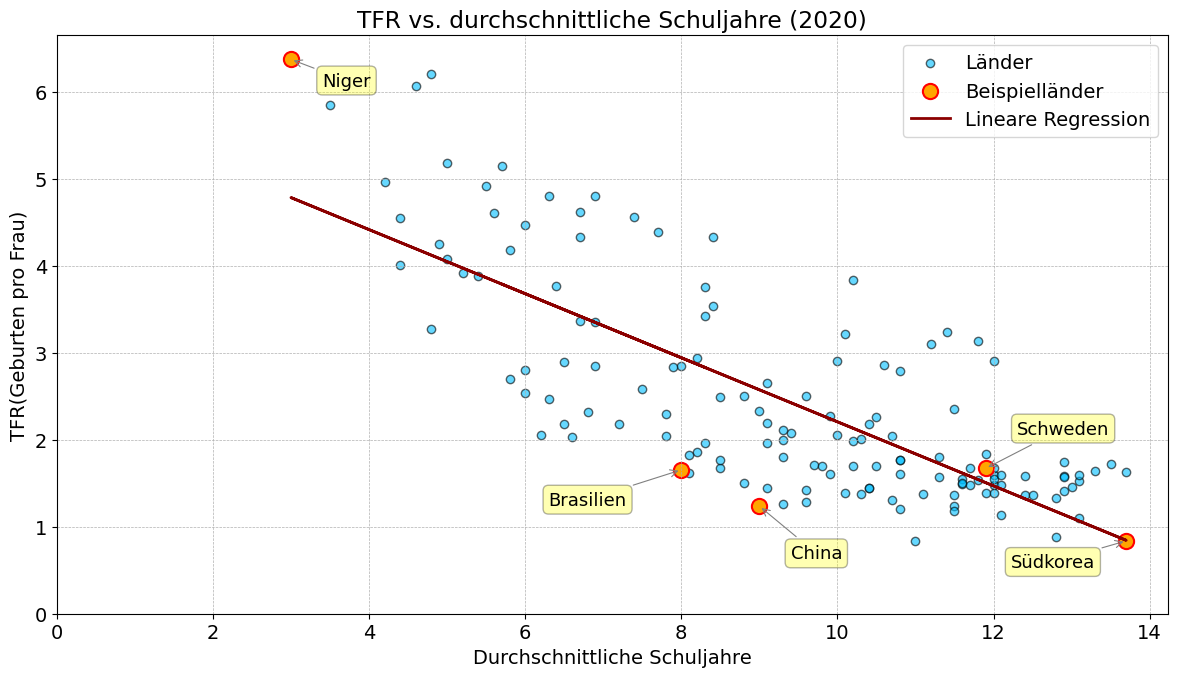

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Schriftgröße global erhöhen
plt.rcParams.update({'font.size': 14})

# Excel-Datei laden
df = pd.read_excel("Fertility_Rate-Average_Years_Of_Schooling.xlsx")

# Spalten bereinigen und umbenennen
df = df[[
    "Country Name",
    "Average years of schooling",
    "Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]"
]].copy()

df.columns = ["Country", "Avg_school_years", "Fertility_rate"]
df.dropna(inplace=True)

# Umwandlung von Kommazahlen zu floats
df["Avg_school_years"] = df["Avg_school_years"].astype(str).str.replace(",", ".").astype(float)

# Regression vorbereiten
X = df["Avg_school_years"].values.reshape(-1, 1)
y = df["Fertility_rate"].values
reg = LinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X)

# Beispielländer
highlight_countries = ["Niger", "Brazil", "Korea, Rep.", "China", "Sweden"]
deutsche_namen = {
    "Niger": "Niger",
    "Brazil": "Brasilien",
    "Korea, Rep.": "Südkorea",
    "China": "China",
    "Sweden": "Schweden"
}

# Plot
plt.figure(figsize=(12, 7))
plt.scatter(df["Avg_school_years"], df["Fertility_rate"],
            alpha=0.6, edgecolor="k", color="deepskyblue", label="Länder")

# Hervorhebung
highlight_df = df[df["Country"].isin(highlight_countries)]
plt.scatter(highlight_df["Avg_school_years"], highlight_df["Fertility_rate"],
            color='orange', edgecolor='red', s=120, linewidth=1.5, label='Beispielländer')

# Individuelle Textpositionierung (dx, dy)
offsets = {
    "Niger": (0.4, -0.3),
    "Brazil": (-0.7, -0.4),
    "Korea, Rep.": (-0.4, -0.3),
    "China": (0.4, -0.6),
    "Sweden": (0.4, 0.4)
}

# Beschriftung
for country in highlight_countries:
    row = highlight_df[highlight_df["Country"] == country]
    if not row.empty:
        x = row["Avg_school_years"].values[0]
        y_val = row["Fertility_rate"].values[0]
        dx, dy = offsets.get(country, (0.3, 0.3))
        ha = "left" if dx >= 0 else "right"
        label = deutsche_namen.get(country, country)
        plt.annotate(label,
                     xy=(x, y_val), xycoords='data',
                     xytext=(x + dx, y_val + dy), textcoords='data',
                     fontsize=13, ha=ha,
                     arrowprops=dict(arrowstyle="->", color='gray', lw=0.8),
                     bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.3))

# Regressionslinie
plt.plot(df["Avg_school_years"], y_pred, color="darkred", linewidth=2, label="Lineare Regression")

# Achsen und Titel
plt.xlabel("Durchschnittliche Schuljahre")
plt.ylabel("TFR(Geburten pro Frau)")
plt.title("TFR vs. durchschnittliche Schuljahre (2020)")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.legend()
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()


<ipython-input-7-1015509552>:115: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc='upper right')


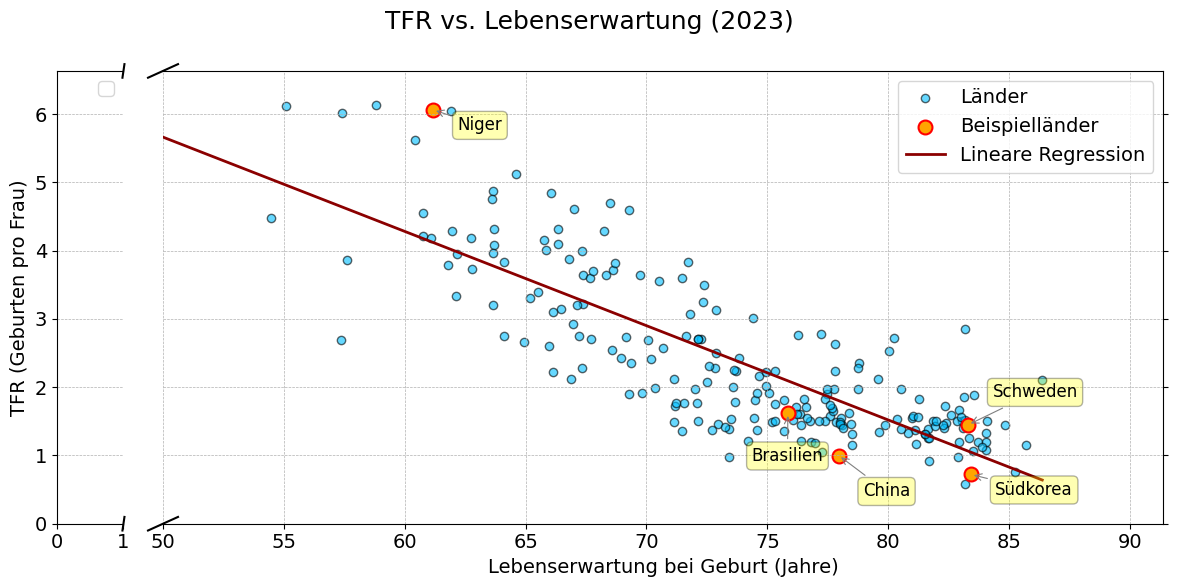

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Excel-Datei laden
df = pd.read_excel("Fertility_Rate-Life_Expectancy.xlsx")

# Spalten anpassen
df = df[[
    "Country Name",
    "Life expectancy at birth, total (years) [SP.DYN.LE00.IN]",
    "Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]"
]].copy()

df.columns = ["Country", "Life_Expectancy", "Fertility_rate"]
df.dropna(inplace=True)
df = df[df["Life_Expectancy"] > 0]

# Regression
X = df["Life_Expectancy"].values.reshape(-1, 1)
y = df["Fertility_rate"].values
reg = LinearRegression()
reg.fit(X, y)

# Achsengrenzen
left_min, left_max = 0, 1
right_min = 50
right_max = df["Life_Expectancy"].max()

# Subplots (gebrochene X-Achse)
fig, (ax1, ax2) = plt.subplots(
    1, 2, sharey=True, figsize=(12, 6),
    gridspec_kw={'width_ratios': [1, 15]}
)

# Linke Achse
ax1.set_xlim(left_min, left_max)
ax1.set_ylim(0, max(df["Fertility_rate"]) + 0.5)
ax1.spines['right'].set_visible(False)
ax1.yaxis.tick_left()
ax1.tick_params(labelright=False)
ax1.grid(True, linestyle="--", linewidth=0.5)

# Rechte Achse
ax2.set_xlim(right_min, right_max + 5)
ax2.set_ylim(0, max(df["Fertility_rate"]) + 0.5)
ax2.spines['left'].set_visible(False)
ax2.yaxis.tick_right()
ax2.grid(True, linestyle="--", linewidth=0.5)

# Länder ab Lebenserwartung >= 50
df_plot = df[df["Life_Expectancy"] >= 50]
ax2.scatter(df_plot["Life_Expectancy"], df_plot["Fertility_rate"],
            alpha=0.6, edgecolor="k", color="deepskyblue", label="Länder")

# Länder hervorheben
highlight_countries = ["Niger", "Brazil", "Korea, Rep.", "China", "Sweden"]
deutsche_namen = {
    "Niger": "Niger",
    "Brazil": "Brasilien",
    "Korea, Rep.": "Südkorea",
    "China": "China",
    "Sweden": "Schweden"
}
highlight_df = df_plot[df_plot["Country"].isin(highlight_countries)]
ax2.scatter(highlight_df["Life_Expectancy"], highlight_df["Fertility_rate"],
            color='orange', edgecolor='red', s=100, linewidth=1.5, label='Beispielländer')

# Position der Beschriftungen mit größerer Schrift
offsets = {
    "Niger": (1, -0.3),
    "Brazil": (-1.5, -0.7),
    "Korea, Rep.": (1, -0.3),
    "China": (1, -0.6),
    "Sweden": (1, 0.4)
}

for country in highlight_countries:
    row = highlight_df[highlight_df["Country"] == country]
    if not row.empty:
        x = row["Life_Expectancy"].values[0]
        y = row["Fertility_rate"].values[0]
        dx, dy = offsets.get(country, (0.5, 0))
        label = deutsche_namen.get(country, country)
        ax2.annotate(label,
                     xy=(x, y), xycoords='data',
                     xytext=(x + dx, y + dy), textcoords='data',
                     fontsize=12,  # << Vergrößert!
                     arrowprops=dict(arrowstyle="->", color='gray', lw=0.8),
                     bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.3))

# Regression (nur im rechten Bereich)
X_pred = np.linspace(right_min, right_max, 300).reshape(-1, 1)
y_pred_plot = reg.predict(X_pred)
ax2.plot(X_pred, y_pred_plot, color="darkred", linewidth=2, label="Lineare Regression")

# Achsentitel
ax2.set_xlabel("Lebenserwartung bei Geburt (Jahre)", fontsize=14)
ax1.set_ylabel("TFR (Geburten pro Frau)", fontsize=14)

# Diagrammtitel normal positioniert
fig.suptitle("TFR vs. Lebenserwartung (2023)", fontsize=18)

# Zacken für gebrochene Achse
d = .015
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (-d, +d), **kwargs)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)

# Legenden
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


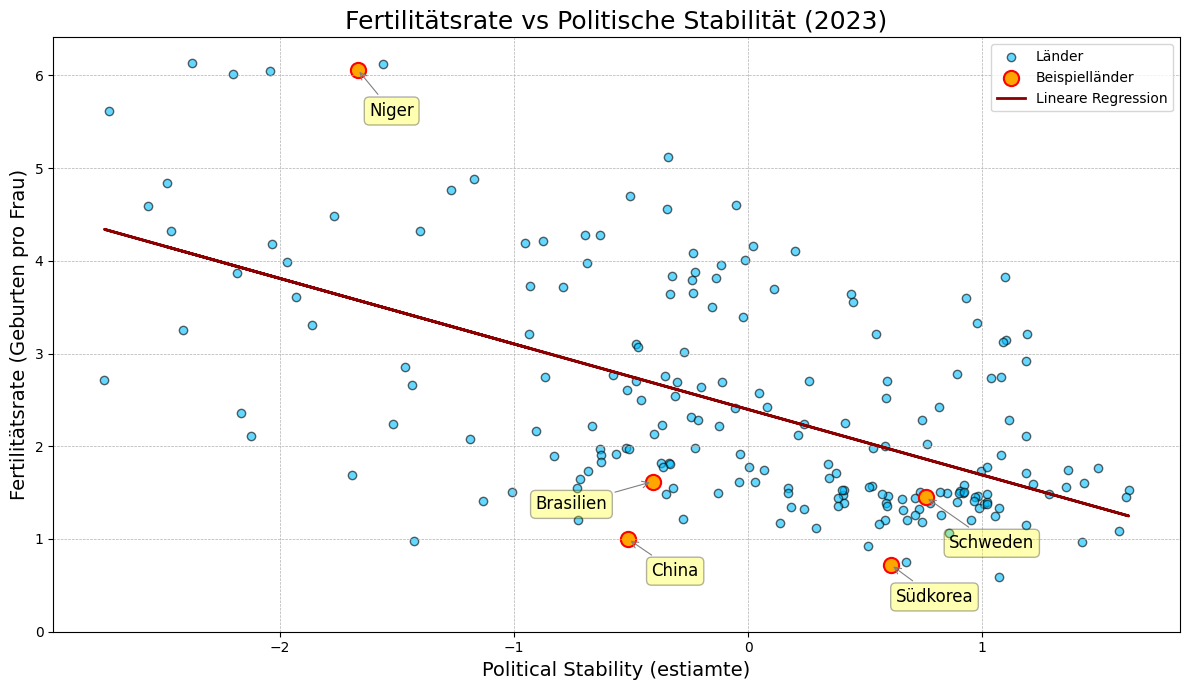

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# === PARAMETERBEREICH: Hier alles anpassen, was sich je nach Datei/Plot ändert === #

# Dateiname und Spalten
excel_datei = "TFR_Political_Stability_And_Absence_Of_Violence.xlsx"
spalte_x = "Political Stability and Absence of Violence/Terrorism: Estimate [PV.EST]"
spalte_y = "Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]"
x_achse_label = "Political Stability (estiamte)"
y_achse_label = "Fertilitätsrate (Geburten pro Frau)"
diagramm_titel = "Fertilitätsrate vs Politische Stabilität (2023)"

# Länder, die hervorgehoben werden sollen
highlight_countries = ["Niger", "Brazil", "Korea, Rep.", "China", "Sweden"]
deutsche_namen = {
    "Niger": "Niger",
    "Brazil": "Brasilien",
    "Korea, Rep.": "Südkorea",
    "China": "China",
    "Sweden": "Schweden"
}

# Optional: Position der Labels
offsets = {
    "Niger": (0.05, -0.5),
    "Brazil": (-0.5, -0.3),
    "Korea, Rep.": (0.02, -0.4),
    "China": (0.1, -0.4),
    "Sweden": (0.1, -0.55)
}

# === DATEN EINLESEN UND VORBEREITEN === #

df = pd.read_excel(excel_datei)

df = df[["Country Name", spalte_x, spalte_y]].copy()
df.columns = ["Country", "X", "Y"]
df.dropna(inplace=True)
df = df[(df["Y"] > 0) & df["X"].notna()]


# Regression vorbereiten
X = df["X"].values.reshape(-1, 1)
y = df["Y"].values
reg = LinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X)

# === PLOTTING === #

plt.figure(figsize=(12, 7))
plt.scatter(df["X"], df["Y"], alpha=0.6, edgecolor="k", color="deepskyblue", label="Länder")

# Hervorgehobene Länder
highlight_df = df[df["Country"].isin(highlight_countries)]
plt.scatter(highlight_df["X"], highlight_df["Y"], color='orange', edgecolor='red', s=120, linewidth=1.5, label='Beispielländer')

# Beschriftungen mit Pfeilen
for country in highlight_countries:
    row = highlight_df[highlight_df["Country"] == country]
    if not row.empty:
        x_val = row["X"].values[0]
        y_val = row["Y"].values[0]
        dx, dy = offsets.get(country, (1, 0))
        label = deutsche_namen.get(country, country)
        plt.annotate(label,
                     xy=(x_val, y_val), xycoords='data',
                     xytext=(x_val + dx, y_val + dy), textcoords='data',
                     fontsize=12,
                     arrowprops=dict(arrowstyle="->", color='gray', lw=0.8),
                     bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.3))

# Regressionslinie
plt.plot(df["X"], y_pred, color="darkred", linewidth=2, label="Lineare Regression")

# Achsen & Titel
plt.xlabel(x_achse_label, fontsize=14)
plt.ylabel(y_achse_label, fontsize=14)
plt.title(diagramm_titel, fontsize=18)
plt.grid(True, linestyle="--", linewidth=0.5)
plt.legend()
# plt.xlim(left=0)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()


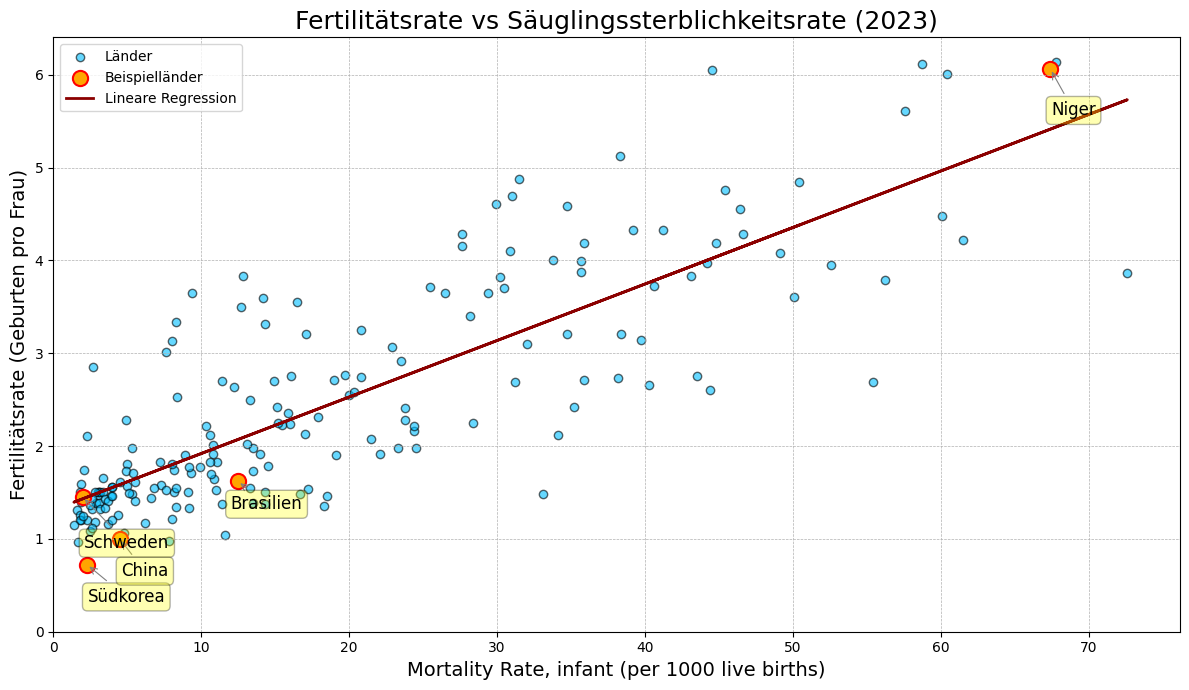

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# === PARAMETERBEREICH: Hier alles anpassen, was sich je nach Datei/Plot ändert === #

# Dateiname und Spalten
excel_datei = "TFR_Mortality_Rate_Infant.xlsx"
spalte_x = "Mortality rate, infant (per 1,000 live births) [SP.DYN.IMRT.IN]"
spalte_y = "Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]"
x_achse_label = "Mortality Rate, infant (per 1000 live births)"
y_achse_label = "Fertilitätsrate (Geburten pro Frau)"
diagramm_titel = "Fertilitätsrate vs Säuglingssterblichkeitsrate (2023)"

# Länder, die hervorgehoben werden sollen
highlight_countries = ["Niger", "Brazil", "Korea, Rep.", "China", "Sweden"]
deutsche_namen = {
    "Niger": "Niger",
    "Brazil": "Brasilien",
    "Korea, Rep.": "Südkorea",
    "China": "China",
    "Sweden": "Schweden"
}

# Optional: Position der Labels
offsets = {
    "Niger": (0.05, -0.5),
    "Brazil": (-0.5, -0.3),
    "Korea, Rep.": (0.02, -0.4),
    "China": (0.1, -0.4),
    "Sweden": (0.1, -0.55)
}

# === DATEN EINLESEN UND VORBEREITEN === #

df = pd.read_excel(excel_datei)

df = df[["Country Name", spalte_x, spalte_y]].copy()
df.columns = ["Country", "X", "Y"]
df.dropna(inplace=True)
df = df[(df["Y"] > 0) & df["X"].notna()]


# Regression vorbereiten
X = df["X"].values.reshape(-1, 1)
y = df["Y"].values
reg = LinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X)

# === PLOTTING === #

plt.figure(figsize=(12, 7))
plt.scatter(df["X"], df["Y"], alpha=0.6, edgecolor="k", color="deepskyblue", label="Länder")

# Hervorgehobene Länder
highlight_df = df[df["Country"].isin(highlight_countries)]
plt.scatter(highlight_df["X"], highlight_df["Y"], color='orange', edgecolor='red', s=120, linewidth=1.5, label='Beispielländer')

# Beschriftungen mit Pfeilen
for country in highlight_countries:
    row = highlight_df[highlight_df["Country"] == country]
    if not row.empty:
        x_val = row["X"].values[0]
        y_val = row["Y"].values[0]
        dx, dy = offsets.get(country, (1, 0))
        label = deutsche_namen.get(country, country)
        plt.annotate(label,
                     xy=(x_val, y_val), xycoords='data',
                     xytext=(x_val + dx, y_val + dy), textcoords='data',
                     fontsize=12,
                     arrowprops=dict(arrowstyle="->", color='gray', lw=0.8),
                     bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.3))

# Regressionslinie
plt.plot(df["X"], y_pred, color="darkred", linewidth=2, label="Lineare Regression")

# Achsen & Titel
plt.xlabel(x_achse_label, fontsize=14)
plt.ylabel(y_achse_label, fontsize=14)
plt.title(diagramm_titel, fontsize=18)
plt.grid(True, linestyle="--", linewidth=0.5)
plt.legend()
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()
